In [1]:
import numpy as np     #Importing numpy package
import pandas as pd    #Importing pandas package
import seaborn as sns  #Importing seaborn package
import sklearn         #Importing sklearn package
import matplotlib.pyplot as plt   #Importing matplotlib package
%matplotlib inline

In [3]:
data = pd.read_csv("forestfires.csv")    #Reading the dataset from drive
data   #Displaying the dataframe

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
data.shape

(517, 13)

In [5]:
data.columns 

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [6]:
print(len(data.select_dtypes(include=['object']).columns))    
print(len(data.select_dtypes(include=['int64','float64']).columns))   
print(len(data.select_dtypes(include=['bool']).columns))      

2
11
0


In [7]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [11]:
data.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [12]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
data.describe(include=['object'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [14]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

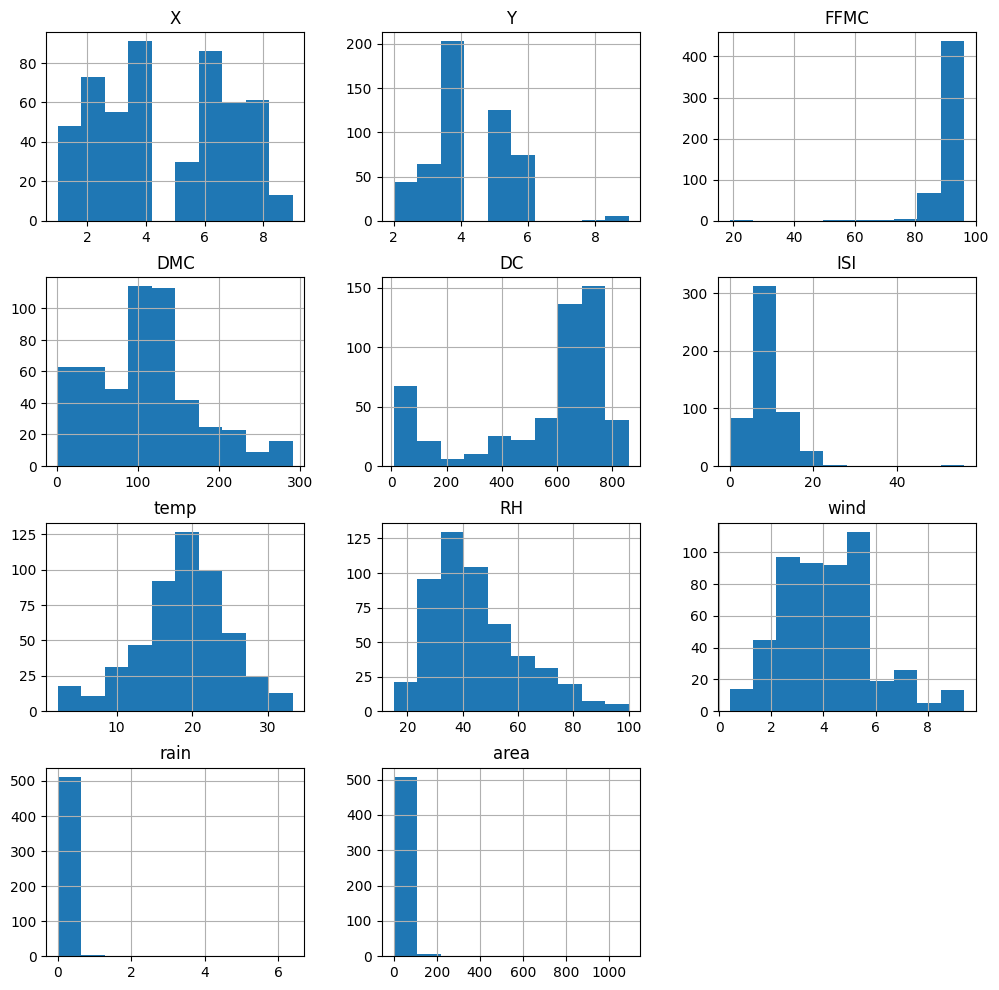

In [16]:
data.hist(figsize=(12,12))  

<Axes: >

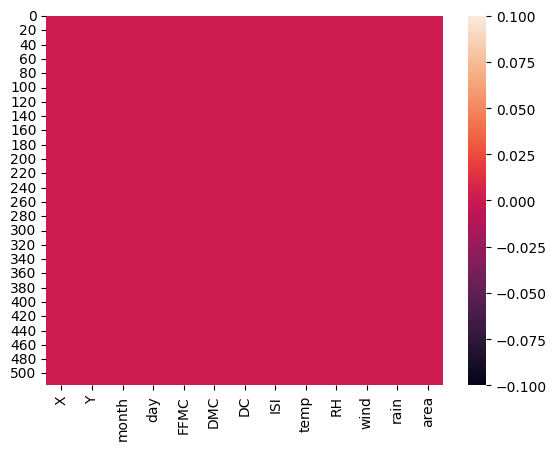

In [17]:
sns.heatmap(data.isna())

Data Visualisation

In [18]:
data['Log-area']=np.log10(data['area']+1)    #To find the log of the column area

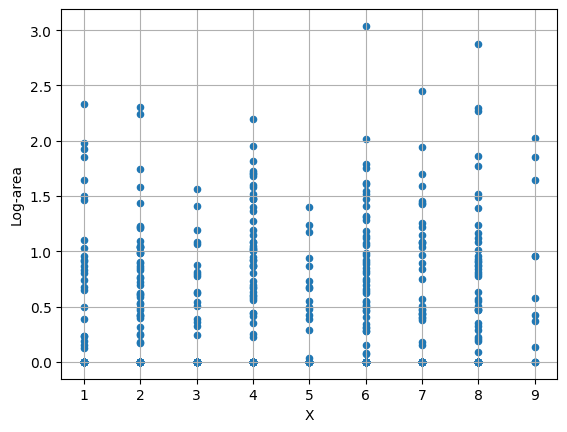

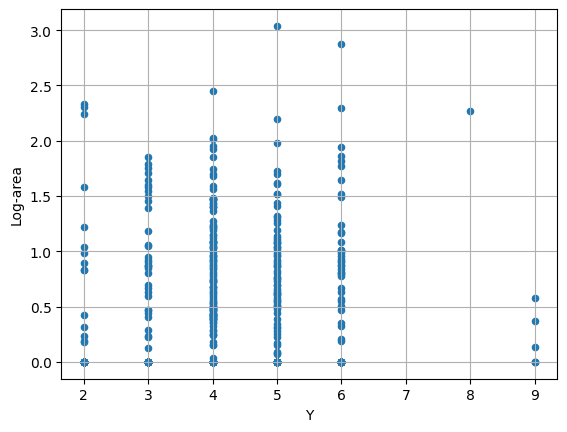

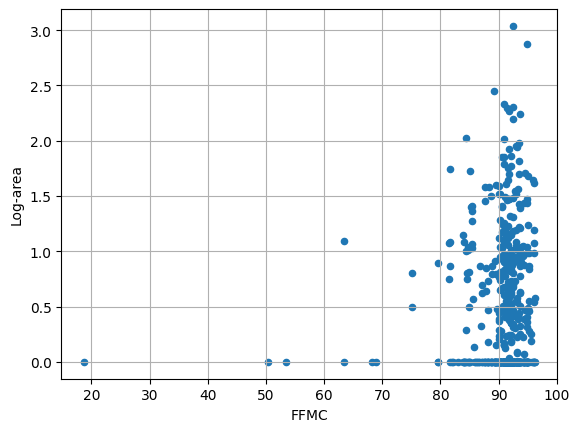

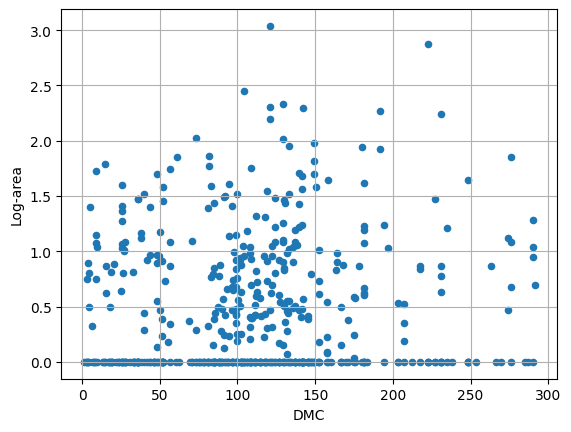

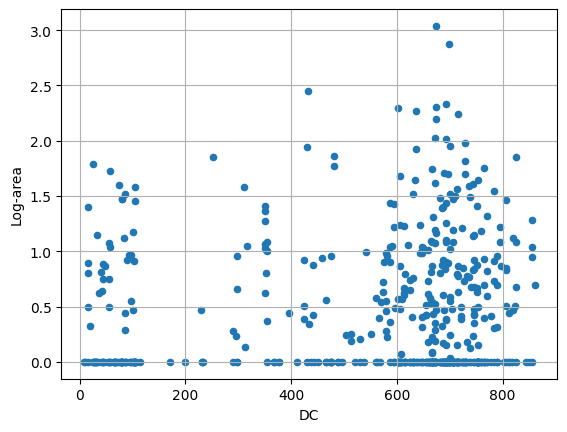

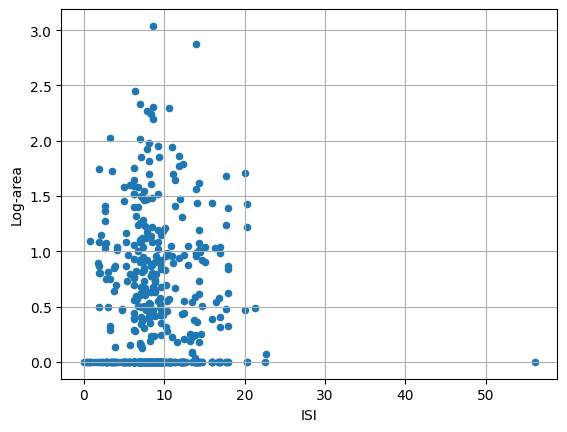

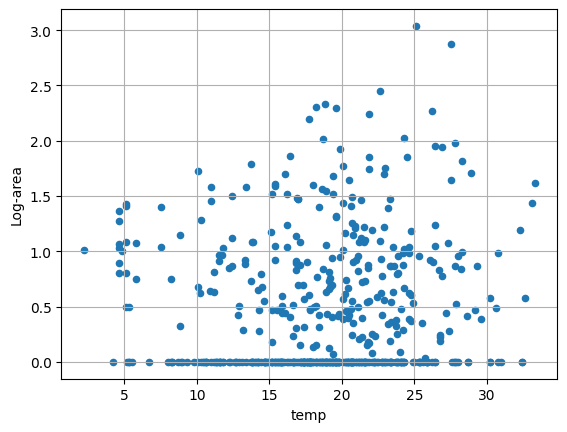

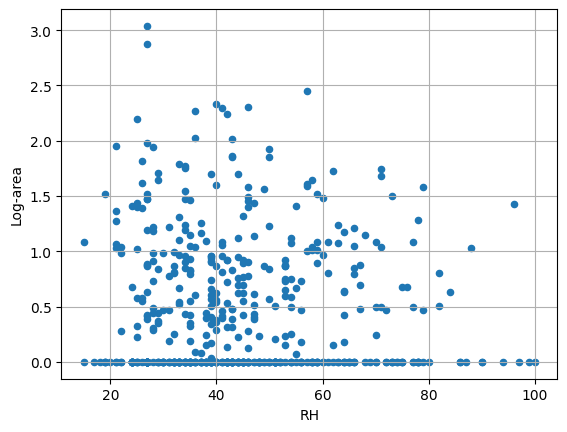

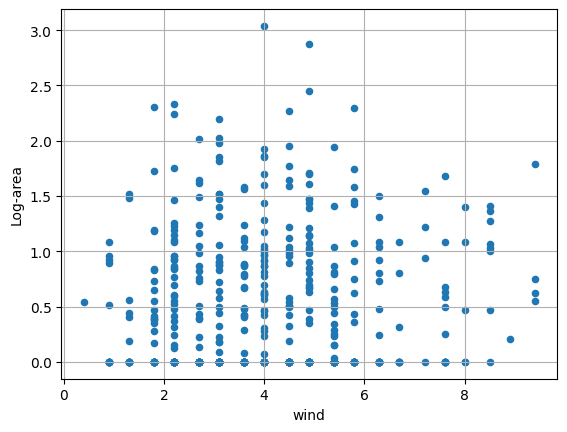

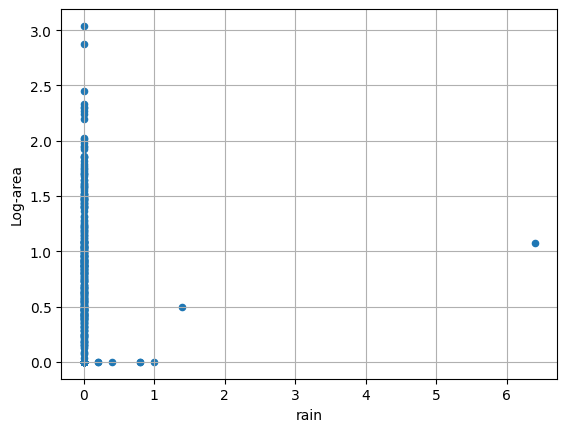

In [19]:
for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'Log-area',grid=True)    #Display the scatter plot with x-axis as columns and y-axis as log area column

<Axes: title={'center': 'Log-area'}, xlabel='day'>

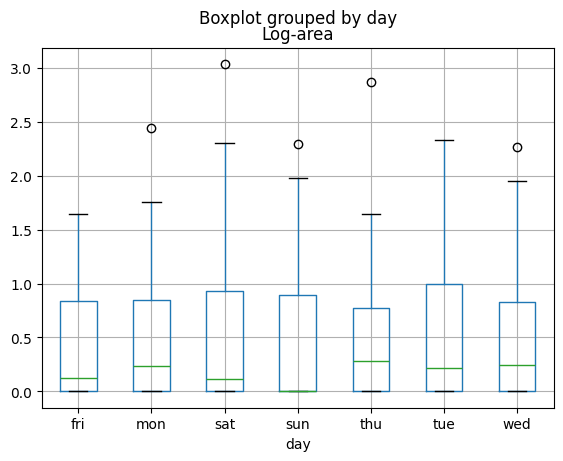

In [20]:
data.boxplot(column='Log-area',by='day')     #Boxplot which shows the how categorical column "day" affect the outcome

<Axes: title={'center': 'Log-area'}, xlabel='month'>

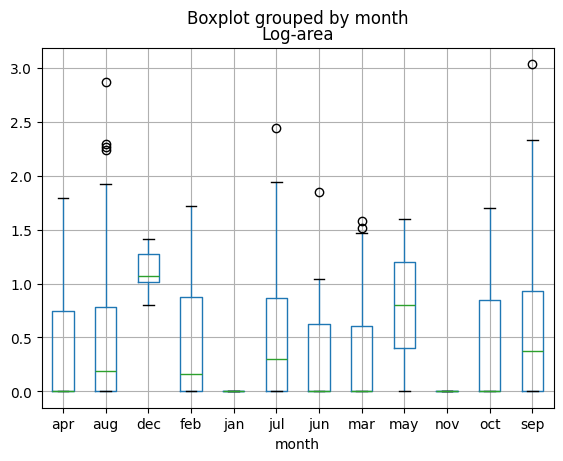

In [21]:
data.boxplot(column='Log-area',by='month')      #Boxplot which shows the how categorical column "month" affect the outcome

Encoding Categorical Data

In [24]:
data['month'] 

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [25]:
dummy_set = pd.get_dummies(data.month)

In [26]:
dummy_set  

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,True,False,False,False,False,False,False,False,False,False,False
513,False,True,False,False,False,False,False,False,False,False,False,False
514,False,True,False,False,False,False,False,False,False,False,False,False
515,False,True,False,False,False,False,False,False,False,False,False,False


In [27]:
data['day'] 

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [28]:
dummy_set1 = pd.get_dummies(data.day)  
dummy_set1 

,fri,mon,sat,sun,thu,tue,wed
0,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
512,False,False,False,True,False,False,False
513,False,False,False,True,False,False,False
514,False,False,False,True,False,False,False
515,False,False,True,False,False,False,False


In [29]:
# Concatenating the original dataframe and dataframe of dummy columns
merged_data = pd.concat([data, dummy_set, dummy_set1 ], axis=1)
merged_data    #Displaying the merged data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,False,False,False,True,False,False,False,False,False,False
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,False,True,False,False,False,False,False,False,True,False
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,False,True,False,False,False,True,False,False,False,False
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,False,False,False,True,False,False,False,False,False,False
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,False,False,False,False,False,False,True,False,False,False
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,False,False,False,False,False,False,True,False,False,False
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,...,False,False,False,False,False,False,True,False,False,False
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,False,False,False,False,False,True,False,False,False,False


In [30]:
# Creating dummy columns and dropping the dummy column
pd.get_dummies(data, columns=['month','day'], drop_first=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,False,False,False,False,False,False,True,False,False,False
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,False,False,False,False,False,False,True,False,False,False
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,False,False,False,False,False,False,True,False,False,False
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,False,False,False,False,False,True,False,False,False,False


Label Encoding

In [31]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import OneHotEncoder         
from sklearn.preprocessing import LabelEncoder          

In [32]:
enc = LabelEncoder()
enc.fit(data['month'])    ## month column

LabelEncoder()

In [33]:
enc.classes_    #Encoding classes of month column

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [34]:
data['month_encoded']=enc.transform(data['month'])    #Transforming the encoded month column
data.head()   

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [35]:
enc.fit(data['day'])  ## day column

LabelEncoder()

In [36]:
enc.classes_    #Encoding classes of day column

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [37]:
data['day_encoded']=enc.transform(data['day'])     #Transforming the encoded day column
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0,1,3
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0,1,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0,1,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0,11,5
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0,11,2


Splitting the data

In [38]:
test_size=0.4

In [39]:
X = data.drop(['area','Log-area','month','day'], axis=1)   #Splitting the dataset to X by dropping the columns area,logarea,month,day
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,7,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,10,5
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,10,2
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,7,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,7,3


In [40]:
y = data['Log-area']     #Splitting the dataset to y by dropping the columns logarea
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Log-area, dtype: float64

In [41]:
# Preparing Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state= 156)

In [42]:
print(X_train.shape)    
print(X_test.shape)     
print(y_train.shape)   
print(y_test.shape)     
X_train     

(310, 12)
(207, 12)
(310,)
(207,)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded
293,7,6,93.1,180.4,430.8,11.0,26.9,28,5.4,0.0,5,5
390,7,4,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,3,1
237,1,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,11,5
337,6,3,91.6,108.4,764.0,6.2,23.0,34,2.2,0.0,11,1
453,4,5,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
279,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,2,1
55,4,3,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,11,4
10,7,5,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,11,2
485,2,4,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,1,1


Model Building

In [43]:
def rec(m,n,tol):      #Defining rec
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size       #Assigning m.size to l
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)   #Returning (100*percent/l) value

In [44]:
tol_max=20    # Assigning Maxvalue

Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor     
from sklearn.model_selection import GridSearchCV      

In [46]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [47]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)            
grid_RF.fit(X_train,y_train)     #Fitting the X_train and y_train in the model

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [48]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)      #Displaying the best parameters obtained by Grid Search

Best parameters obtained by Grid Search: {'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [49]:
a=grid_RF.predict(X_test)     #Predicting the X_test by grid rf
rmse_rf=np.sqrt(np.mean((y_test-a)**2))     #RMSE formula
print("RMSE for Random Forest:",rmse_rf)    #Printing the Rmse value for random forest

RMSE for Random Forest: 0.6291534353467767


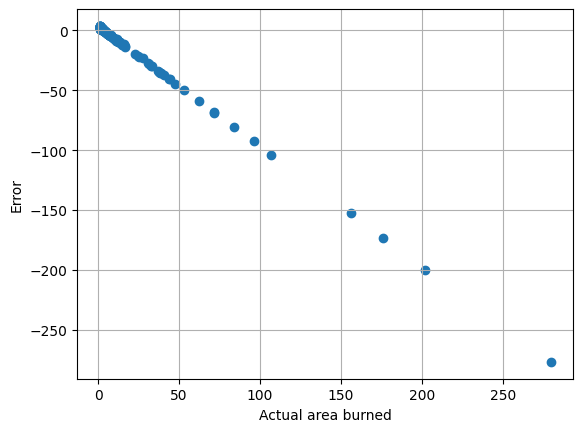

In [50]:
##Scatter plot to show actual area burned and error
plt.xlabel("Actual area burned")      # To print xlabel as actual area burned
plt.ylabel("Error")          # To print ylabel as error
plt.grid(True)     #plotting as a grid
plt.scatter(10**(y_test),10**(a)-10**(y_test))    ##plotting a Scatterplot

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   1.,   4.,   4.,
          3.,   4.,   2.,  15.,  26., 137.]),
 array([-276.58952306, -270.98615004, -265.38277702, -259.779404  ,
        -254.17603098, -248.57265795, -242.96928493, -237.36591191,
        -231.76253889, -226.15916587, -220.55579285, -214.95241983,
        -209.34904681, -203.74567379, -198.14230077, -192.53892774,
        -186.93555472, -181.3321817 , -175.72880868, -170.12543566,
        -164.52206264, -158.91868962, -153.3153166 , -147.71194358,
        -142.10857055, -136.50519753, -130.90182451, -125.29845149,
        -119.69507847, -114.09170545, -108.48833243, -102.88495941,
         -97.28158639,  -91.67821336,  -86.07484034,  -80.47146732,
         -74.8680943 ,  -69.26472128,  -63.661

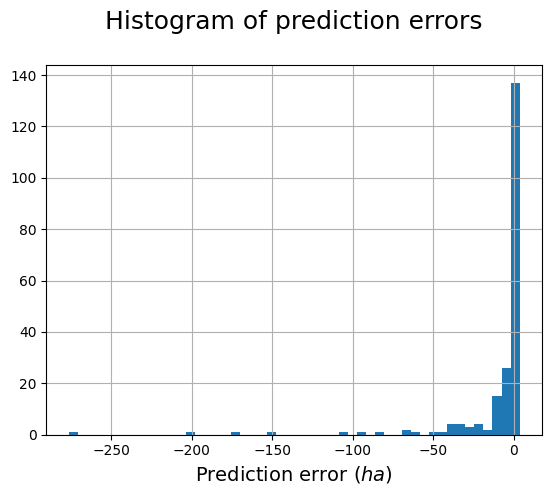

In [51]:
plt.title("Histogram of prediction errors\n",fontsize=18)     ##Title to the plot
plt.xlabel("Prediction error ($ha$)",fontsize=14)    ## xlabel as prediction error
plt.grid(True)    ##plotting as a grid
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)   ##plotting a histogram

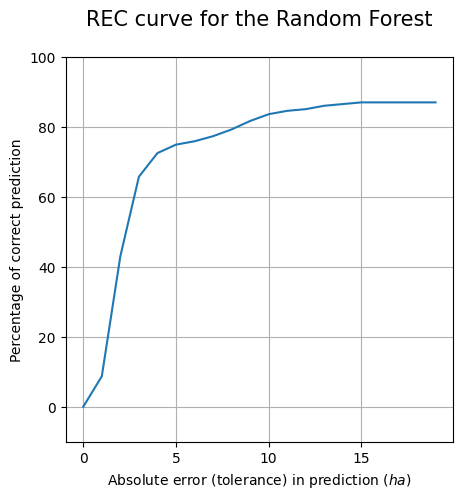

In [52]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))    #Assessing a size to the plot
plt.title("REC curve for the Random Forest\n",fontsize=15)   #title of the plot
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   #assessing x label as absolute error
plt.ylabel("Percentage of correct prediction")   # assessing ylabel as percentage of correct prediction
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)    # giving a y limit as -10 to 100
plt.yticks([i*20 for i in range(6)])
plt.grid(True)    #plotting as a grid
plt.plot(range(tol_max),rec_RF)

Neural Network

In [53]:
from keras.models import Sequential      
import keras.optimizers as opti          
from keras.layers import Dense, Activation,Dropout    

In [54]:
model = Sequential()   #Sequential model
model.add(Dense(100, input_dim=12))    #adding dense to the model
model.add(Activation('selu'))   #adding activation of 'selu' to the model
model.add(Dropout(0.3))   #adding dropout as 0.3 to the model
model.add(Dense(100))   #adding dense as 100 to the model
model.add(Dropout(0.3))    #Adding dropout 0.3 to the model
model.add(Activation('selu'))  #adding activation 'selu' to the model
model.add(Dense(50))    #adding dense as 50 to the model
model.add(Activation('elu'))   #adding activation 'elu' to the model
model.add(Dense(1))   #adding dense as 1 to the model
model.summary()   ##Displaying the summary of the model

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,501 (64.46 KB)

 Trainable params: 16,501 (64.46 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
learning_rate=0.001   #assigning a learning rate
optimizer = opti.RMSprop(lr=learning_rate)  #optimizing the learning rate
model.compile(optimizer=optimizer,loss='mse')  #compiling the model with optimizer and loss 'mse'

ValueError: Argument(s) not recognized: {'lr': 0.001}